<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day5_drop_the_overfitting_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

#데이터 다운로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std


#학습데이터 검증 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)
print('data ready~')


170500096/170498071 [==============================] - 2s 0us/step
data ready~


드롭아웃 사용하여 모델 구성


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

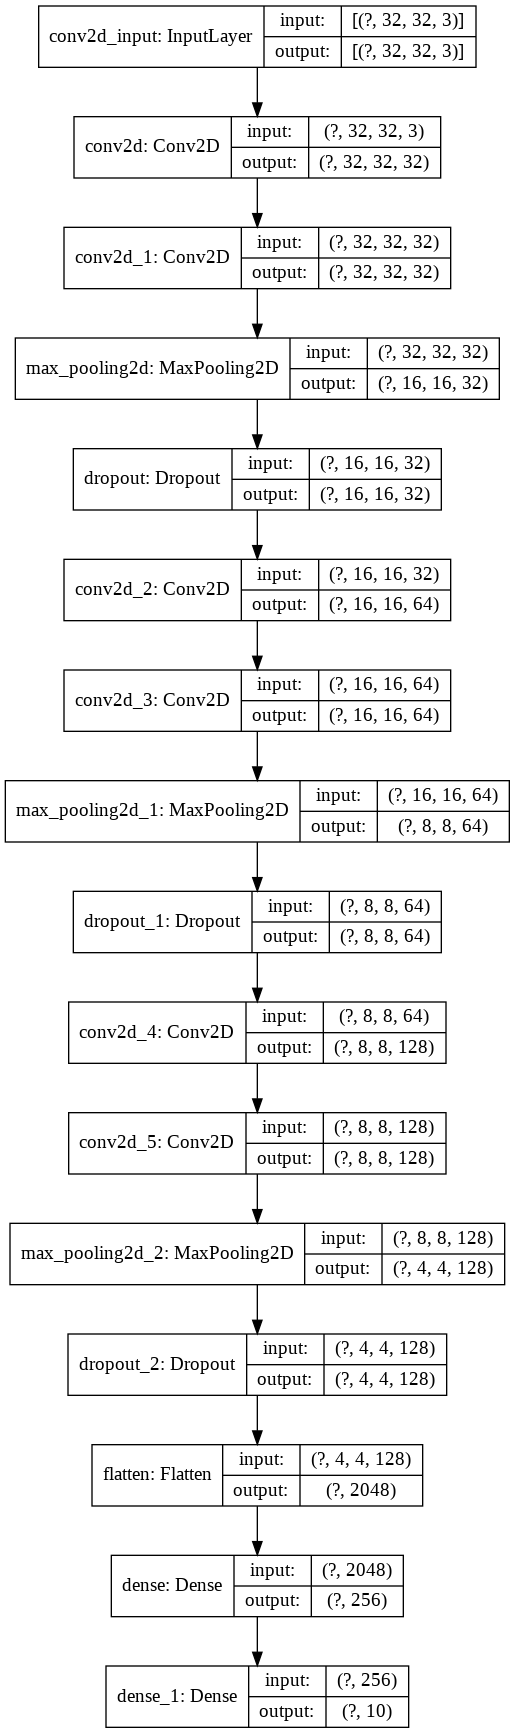

In [ ]:
import tensorflow as tf

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])


In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))


Epoch 1/30
1094/1094 [==============================] - 17s 15ms/step - loss: 1.7086 - acc: 0.3709 - val_loss: 1.4196 - val_acc: 0.4891
Epoch 2/30
1094/1094 [==============================] - 16s 15ms/step - loss: 1.3500 - acc: 0.5112 - val_loss: 1.2644 - val_acc: 0.5538
Epoch 3/30
1094/1094 [==============================] - 16s 15ms/step - loss: 1.1892 - acc: 0.5741 - val_loss: 1.1403 - val_acc: 0.5959
Epoch 4/30
1094/1094 [==============================] - 16s 15ms/step - loss: 1.0676 - acc: 0.6213 - val_loss: 1.0557 - val_acc: 0.6265
Epoch 5/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.9780 - acc: 0.6540 - val_loss: 0.9482 - val_acc: 0.6706
Epoch 6/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.9016 - acc: 0.6846 - val_loss: 0.9063 - val_acc: 0.6849
Epoch 7/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.8441 - acc: 0.7029 - val_loss: 0.8628 - val_acc: 0.7031
Epoch 8/30
1094/1094 [==========================

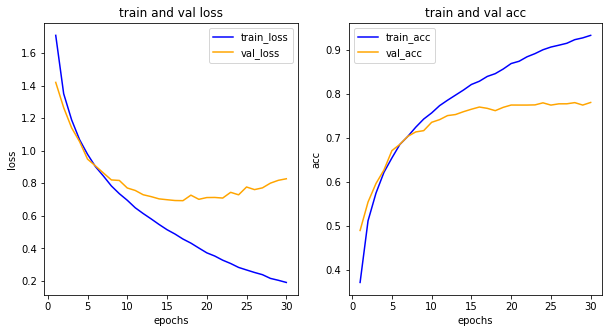

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.8598 - acc: 0.7768


[0.8597884774208069, 0.7767999768257141]

미적용 - loss: 1.8903 - acc: 0.7182

규제화 - loss: 1.8032 - acc: 0.7247

드롭 아웃 - loss: 0.8598 - acc: 0.7768
